# Seaborn

# 一.概念

## 1分组绘图

In [ ]:
#比如说需要在一张图上绘制两条曲线，分别是南方和北方的气温变化，分别用不同的颜色加以区分。在seaborn中用hue参数控制分组绘图

## 2.分面绘图

In [ ]:
#其实就是在一张纸上划分不同的区域，比如2*2的子区域，在不同的子区域上绘制不同的图形，在matplotlib中就是 add_subplot(2,2,1)，在seaborn中用col参数控制，col的全称是columns，不是color，如果辅助col_wrap参数会更好些。后来发现，col可以控制columns的子图，那么row可以控制rows的子图排列。 
#如果需要分面绘图，应该使用seaborn的FacetGrid对象，seaborn的一般的绘图函数是没有分面这个参数的。

## 3.统计函数

In [ ]:
#分组绘图的时候，会对分组变量先要用统计函数，然后绘图，比如先计算变量的均值，然后绘制该均值的直方图。统计绘图参数是 estimator，很多情况下默认是numpy.mean。在ggplot2中就大量使用了这种方法。如果不适用统计绘图，就需要先用pandas进行groupby分组汇总，然后用seaborn绘图，多此一举了。

# 二.图形分类

In [ ]:
#在seaborn中图形大概分这么几类，因子变量绘图，数值变量绘图，两变量关系绘图，时间序列图，热力图，分面绘图等。

## 1.因子变量绘图

In [ ]:
#在seaborn中图形大概分这么几类，因子变量绘图，数值变量绘图，两变量关系绘图，时间序列图，热力图，分面绘图等。

### 1.1箱线图boxplot

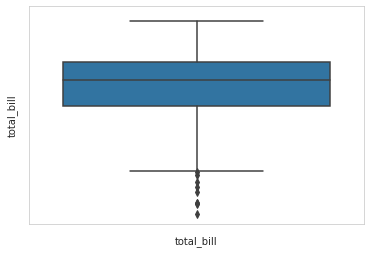

In [11]:
#箱线图提供有关数据位置的分散情况
#主要包含六个数据节点,分别是,上边缘,上四分位,中位数,下四分位,下边缘
#超出边界的为异常值
import seaborn as sns
#设置图样类型
sns.set_style('whitegrid')
#导入系统自带tips数据包
tips=sns.load_dataset('tips')
#绘制箱线图
ax=sns.boxplot(x=tips['total_bill'])
#竖着放的箱线图,也就是将x换成y
ax=sns.boxplot(y=tips['total_bill'])


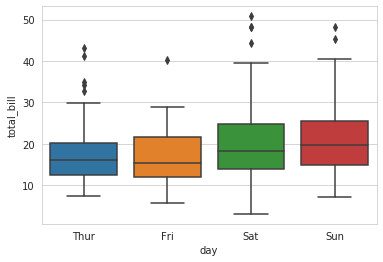

In [12]:
#分组绘制箱线图,分组因子是day,在x轴不同位置绘制
ax=sns.boxplot(x='day',y='total_bill',data=tips)

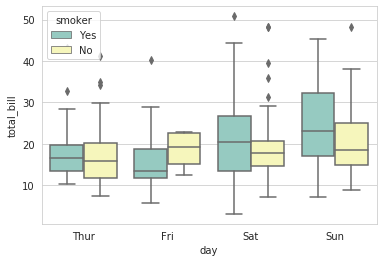

In [13]:
#分组箱线图,分子因子是smoker,不同的因子用不同颜色区分,
#palette参数是调色板,hue参数是分子因子名称
#
ax=sns.boxplot(x='day',y='total_bill',hue='smoker',data=tips,palette='Set3')

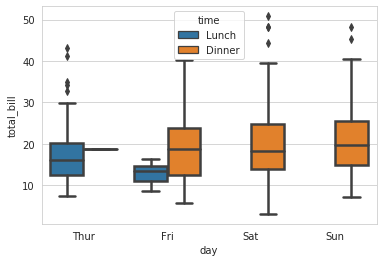

In [14]:
#改变线宽,linewidth参数
ax=sns.boxplot(x='day',y='total_bill',hue='time',data=tips,linewidth=2.5)


In [16]:
tips.head(5)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


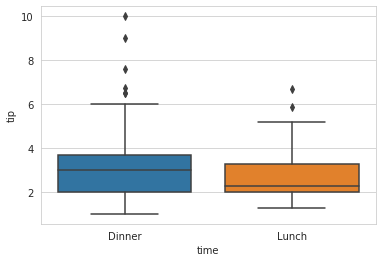

In [24]:
#改变x轴顺序,order参数
ax=sns.boxplot(data=tips,y='tip',x='time', order=["Dinner", "Lunch"])

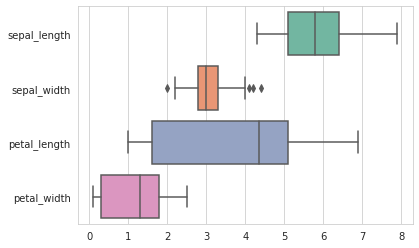

In [27]:
#将数据的每一个变量都绘制一个箱线图,水平放置,参数orient ,参数palette决定样式
iris=sns.load_dataset('iris')
ax=sns.boxplot(data=iris,orient='h',palette='Set2')

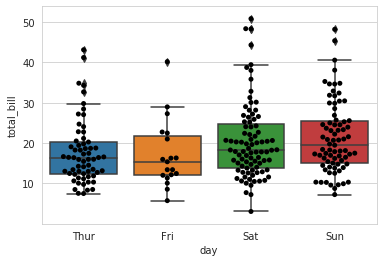

In [32]:
#箱线图+有分布趋势的散点图
ax=sns.boxplot(x='day',y='total_bill',data=tips)
ax=sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

### 1.2小提琴图violinplot

In [34]:
#小提琴图其实是箱线图与核密度图的结合，箱线图展示了分位数的位置，小提琴图则展示了任意位置的密度，通过小提琴图可以知道哪些位置的密度较高。在图中，白点是中位数，黑色盒型的范围是下四分位点到上四分位点，细黑线表示须。
#外部形状即为核密度估计（在概率论中用来估计未知的密度函数，属于非参数检验方法之一）。

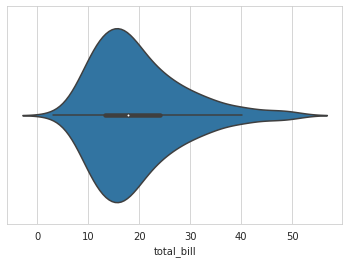

In [37]:
#设置背景图
sns.set_style('whitegrid')
#绘制小提琴图
sns.violinplot(x='total_bill',data=tips)


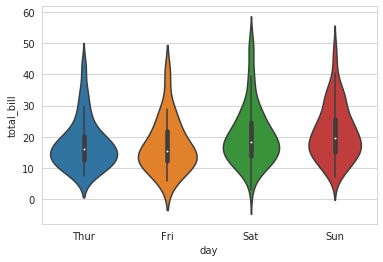

In [39]:
#分组小提琴图,通过x轴分组
ax=sns.violinplot(data=tips,x='day',y='total_bill')

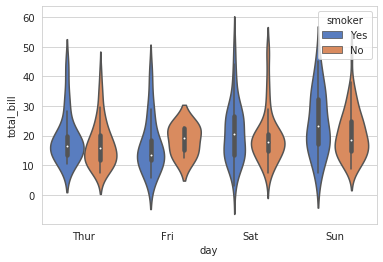

In [41]:
#通过hue分组小提琴图,相当于再分组
sns.violinplot(data=tips,x='day',y='total_bill',
               hue='smoker',palette='muted')

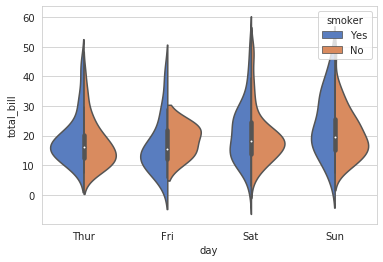

In [42]:
#分组组合小提琴图,相当于将分组的小提琴图,各取一般组合
ax=sns.violinplot(data=tips,x='day',y='total_bill',
                  hue='smoker',palette='muted',split=True)

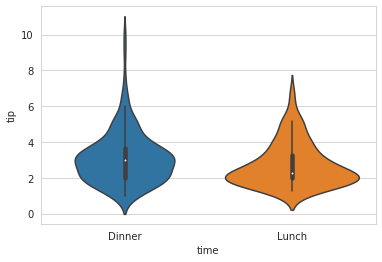

In [44]:
ax=sns.violinplot(x='time',y='tip',data=tips,order=['Dinner','Lunch'])

### 1.3散点图striplot

In [45]:
#seaborn中有两个散点图，一个是普通的散点图，另一个是可以看出分布密度的散点图。

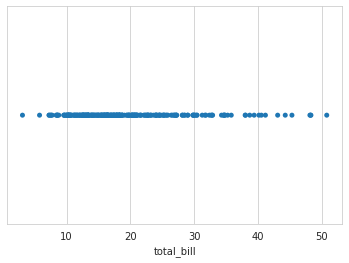

In [56]:
#普通散点图
ax1 = sns.stripplot(x=tips["total_bill"],jitter=False)

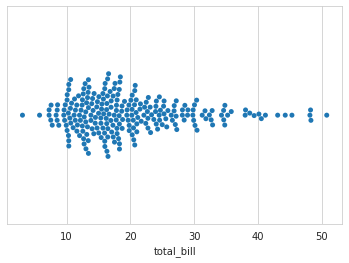

In [49]:
#带分布密度的散点图
ax2=sns.swarmplot(x=tips['total_bill'])

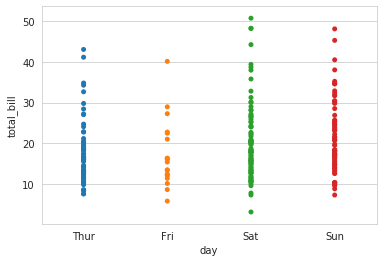

In [55]:
#分组散点图,jiter设置抖动项
ax1 = sns.stripplot(y="total_bill",x='day',data=tips,jitter=False)

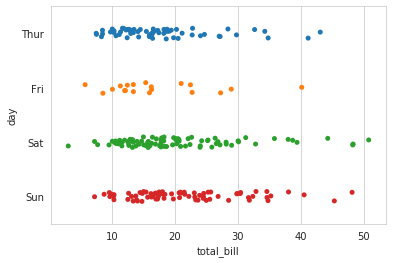

In [57]:
#x,y轴交换
ax1 = sns.stripplot(x="total_bill",y='day',data=tips)

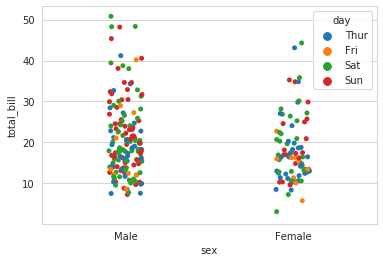

In [60]:
#分组绘制,相当于分组后再分组,通过hue参数控制
ax=sns.stripplot(x="sex", y="total_bill",hue='day',
                    data=tips, jitter=True)

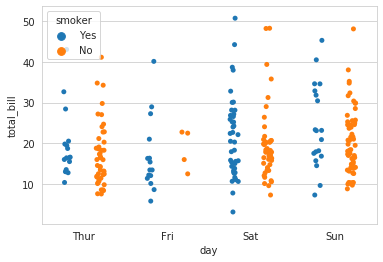

In [63]:
#分开绘制
ax=sns.stripplot(x="day", y="total_bill",hue='smoker',
                    data=tips, jitter=True,split=True)

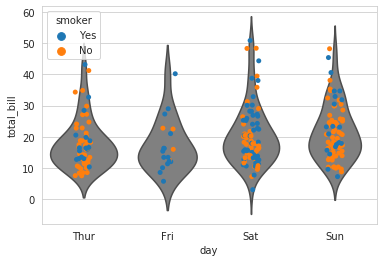

In [71]:
#散点图+小提琴图  inner参数改变小提琴内部
ax=sns.stripplot(x="day", y="total_bill",hue='smoker',
                    data=tips, jitter=True)
ax=sns.violinplot(x='day',y='total_bill',data=tips,color='gray',inner=None)

### 1.4带分布的散点图swarmplot

In [72]:
#swarmplt的参数和用法和stripplot的用法是一样的，只是表现形式不一样而已。

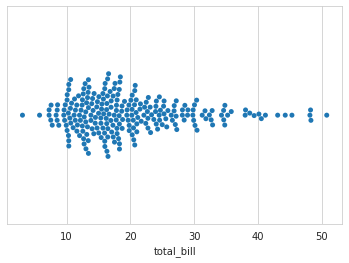

In [73]:
#单个散点图
ax=sns.swarmplot(tips['total_bill'])

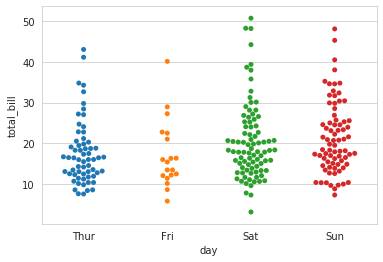

In [74]:
#分组散点图
ax=sns.swarmplot(data=tips,y='total_bill',x='day')

### 1.5直方图barplot

In [ ]:
#直方图的统计函数，默认绘制的是变量的均值 estimator=np.mean

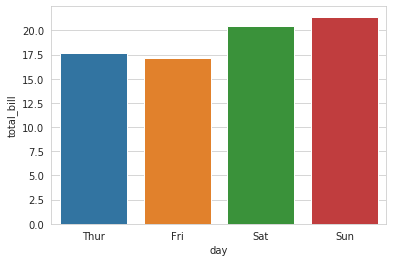

In [79]:
#参数ic 取消直方图上方的置信度线
ax=sns.barplot(data=tips,x='day',y='total_bill',ci=0)

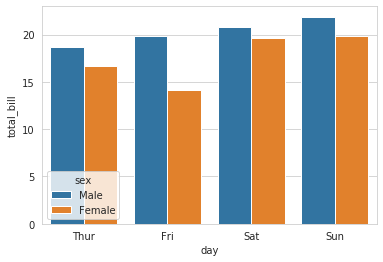

In [80]:
#分组直方图
ax=sns.barplot(data=tips,x='day',y='total_bill',ci=0,hue='sex')

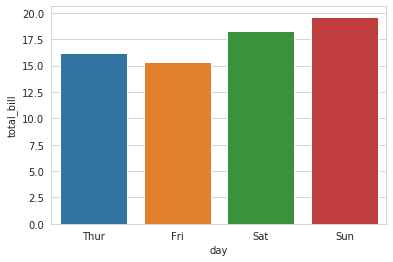

In [84]:
#绘制变量中位数的直方图,estimator指定统计函数 ,
from numpy import median
ax=sns.barplot(data=tips,x='day',y='total_bill',ci=0,estimator=median)

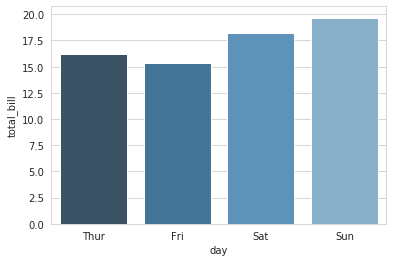

In [83]:
#改变主题颜色 palette参数
ax=sns.barplot(data=tips,x='day',y='total_bill',
               ci=0,estimator=median,palette='Blues_d')

### 1.6计数的直方图countplot

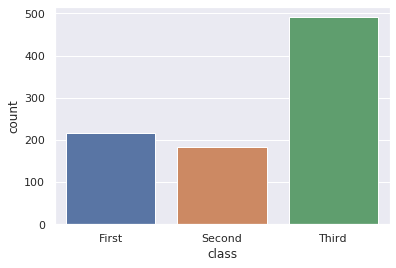

In [85]:
#对因子变量技术,然后绘制条形图
sns.set(style='darkgrid')
titanic=sns.load_dataset('titanic')
ax=sns.countplot(x='class',data=titanic)

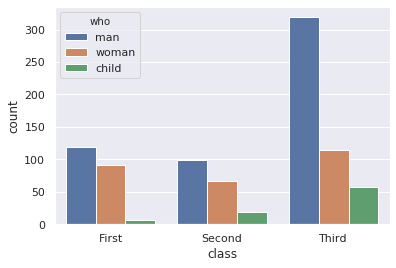

In [87]:
# 分组绘图
ax = sns.countplot(x="class", hue="who", data=titanic)

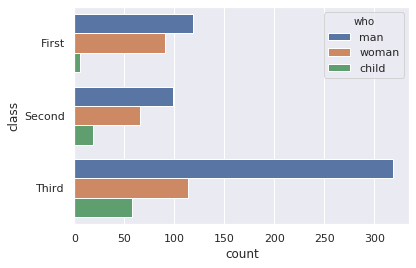

In [89]:
#横放
ax = sns.countplot(y="class", hue="who", data=titanic)

In [91]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1.7两变量关系图factorplot

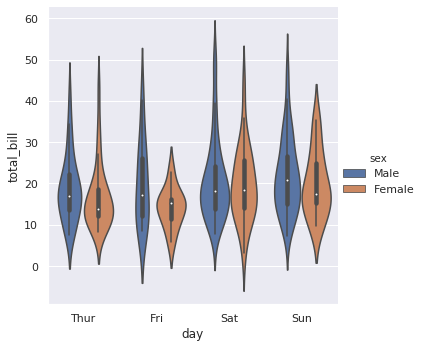

In [93]:
#变量联合绘图
#绘制因子变量-数值变量的分布情况图
#用小提琴图反应 class-who 两变量的分布情形
g=sns.factorplot(data=tips,x='day',y='total_bill',hue='sex',kind='violin')

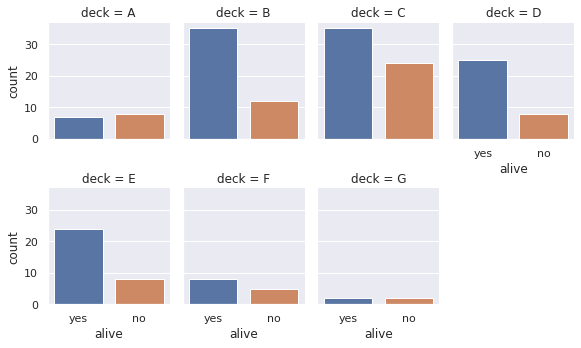

In [97]:
#不同的deck(因子)绘制不同的alive(数值),col为分子图绘制,col_wrap每行画4个子图
g=sns.factorplot(x='alive',col='deck',col_wrap=4,
                 data=titanic[titanic.deck.notnull()],
                 kind='count',size=2.5,aspect=.8)

## 2. 回归图 

In [98]:
#回归图有两个
#lmplot： Plot data and regression model fits across a FacetGrid. 
#regplot：Plot data and a linear regression model fit.

### 2.1线性回归图lmplot

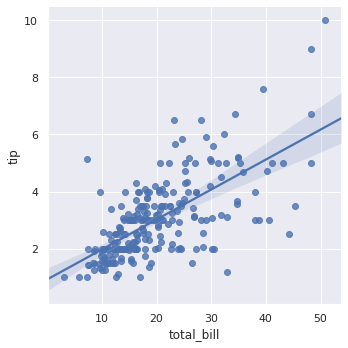

In [99]:
#线性回归图
ax=sns.lmplot(x="total_bill", y="tip", data=tips)

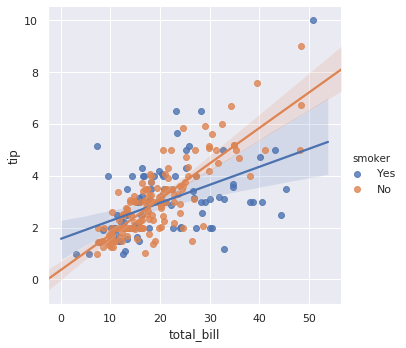

In [101]:
# 分组的线性回归图，通过hue参数控制
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

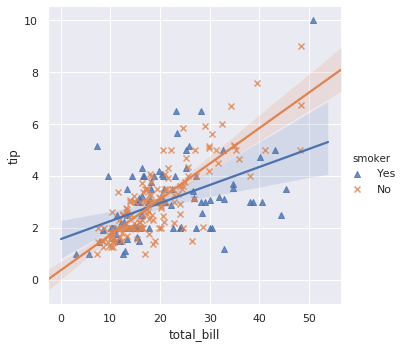

In [103]:
#分组绘图,不同的组用不同的形状标记
g = sns.lmplot(x="total_bill", y="tip",
               hue="smoker", data=tips,markers=['^','x'])

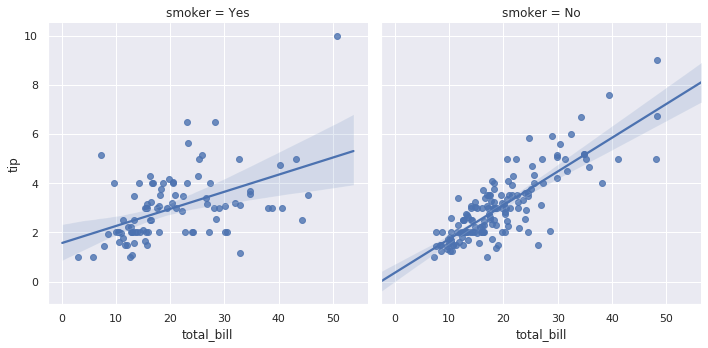

In [105]:
#分开分组绘图
g = sns.lmplot(x="total_bill", y="tip",
               col="smoker", data=tips)

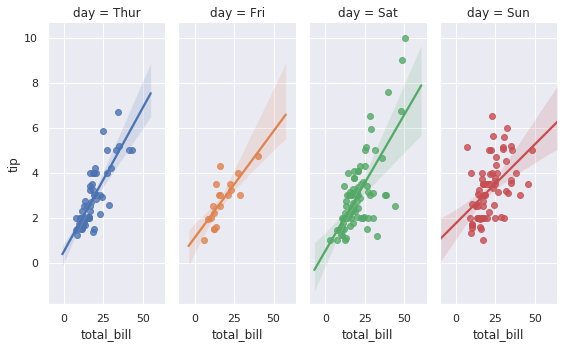

In [111]:
#col+hue 双分组参数,即分组,又分子图绘图
g = sns.lmplot(x="total_bill", y="tip",hue='day',
               col="day", data=tips,aspect=.4)

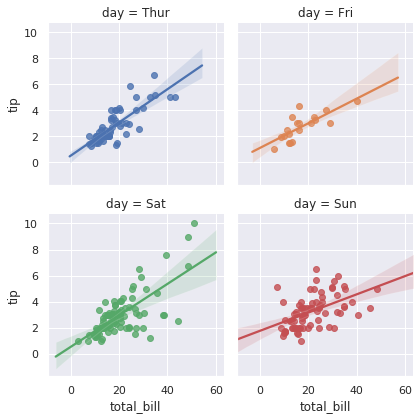

In [112]:
# 分组绘制，控制size尺寸
g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",
                data=tips, col_wrap=2, size=3)

### 2.2逻辑回归图regplot

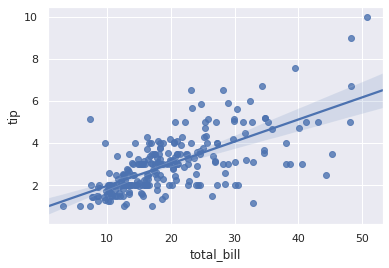

In [114]:
#绘制逻辑回归图
ax = sns.regplot(x="total_bill", y="tip", data=tips)

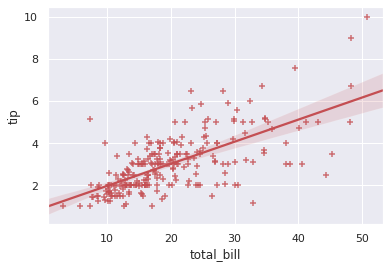

In [116]:
#控制散点的形状和颜色 参数color,marker
ax = sns.regplot(x="total_bill", y="tip", data=tips,marker='+',color='r')

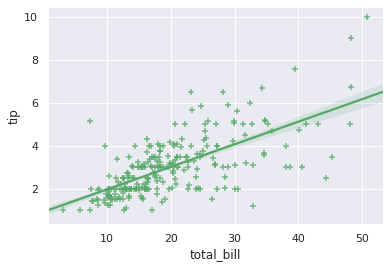

In [117]:
#控制回归的置信度,拟合直线的外面的面积有变化
ax = sns.regplot(x="total_bill", y="tip", data=tips,marker='+',color='g',ci=68)

## 3. 分布图 

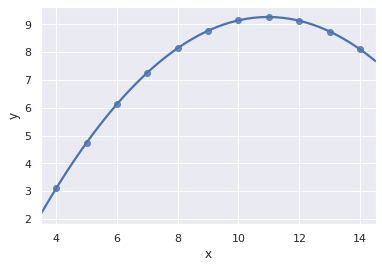

In [124]:
#拟合二次曲线通过参数order=2设置
#拟合一次曲线 参数order=1
ans = sns.load_dataset("anscombe")
ax=sns.regplot(x='x',y='y',data=ans.loc[ans.dataset=='II'],order=2)

## 4. 热力图 

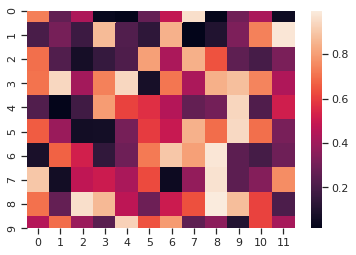

In [127]:
#热力图表示两两因子间的相关性
import numpy as np
import seaborn as sns
uniform_data=np.random.rand(10,12)
ax=sns.heatmap(uniform_data)

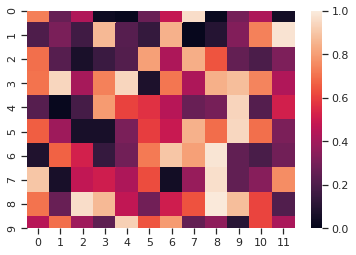

In [139]:
#改变颜色范围
ax=sns.heatmap(uniform_data,vmin=1,vmax=0)

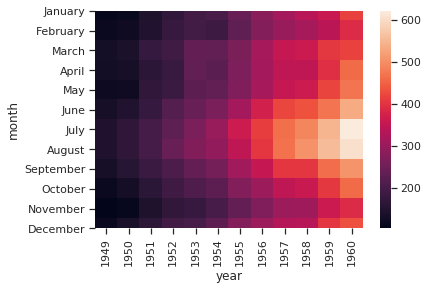

In [137]:
# 绘制x-y-z的热力图，比如 年-月-销量 的热力图
flights=sns.load_dataset('flights')
flights = flights.pivot("month", "year", "passengers")
ax=sns.heatmap(flights)


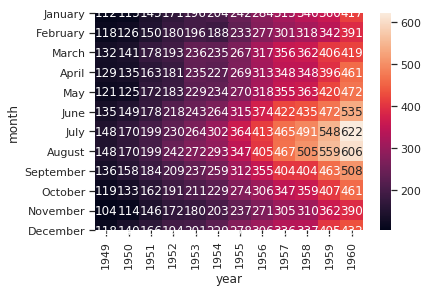

In [138]:
#绘制热力图,将数值写到热力图上
ax=sns.heatmap(flights,annot=True,fmt='d')

## 5.数值分布绘图

### 5.1.直方图distplot

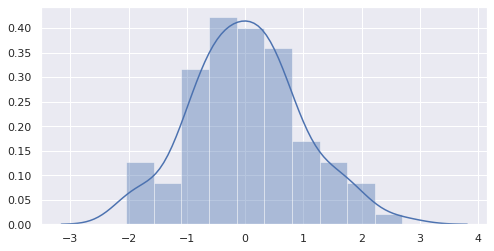

In [142]:
#绘制数值变量的密度分布图
#默认既绘制核密度曲线,也绘制直方图
#直方图hist=True，核密度曲线rug=True
sns.set(rc={'figure.figsize':(8,4)})
x=np.random.randn(100)
ax=sns.distplot(x)

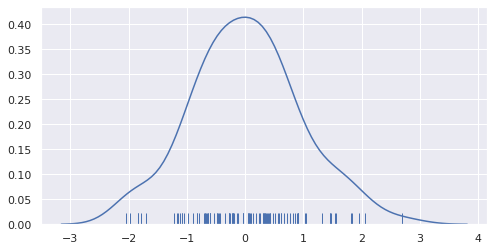

In [143]:
#只绘制核密度曲线,不绘制直方图
x=sns.distplot(x,hist=False,rug=True)

### 5.2.双变量关系图 jointplot

In [144]:
#多变量联合,kind参数可以使用不同的图形反应两变量的关系，比如点图，线图，核密度图。

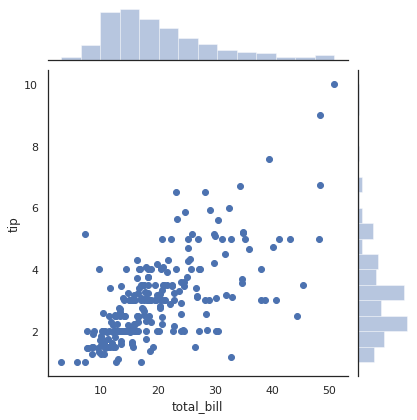

In [147]:
sns.set(style='white')
g=sns.jointplot(x='total_bill',y='tip',data=tips)

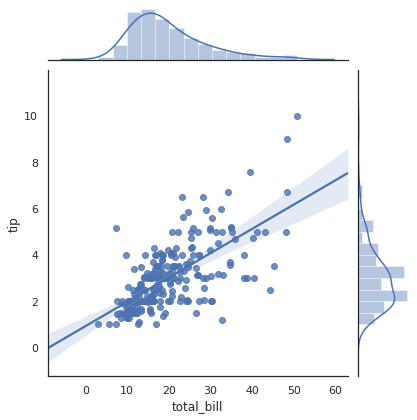

In [148]:
# 通过kind参数，除了绘制散点图，还要绘制拟合的直线，拟合的核密度图
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg")